# **HEART DISEASE ANALYSIS** 

## **About the Data set**
> This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.

> **Attribute Information**
> * Age (age in years)
> * Sex (1 = male; 0 = female)
> * CP (chest pain type)
> * TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
> * CHOL (serum cholestoral in mg/dl)
> * FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
> * RESTECH (resting electrocardiographic results)
> * THALACH (maximum heart rate achieved)
> * EXANG (exercise induced angina (1 = yes; 0 = no))
> * OLDPEAK (ST depression induced by exercise relative to rest)
> * SLOPE (the slope of the peak exercise ST segment)
> * CA (number of major vessels (0-3) colored by flourosopy)
> * THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
> * TARGET (1 or 0)

## Table of Contents
1) Import Packages

2) EDA

3) Preparing ML models

4) Models evaluation

5) Ensembling

## Packages Required

In [1]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
#import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv("C:/Users/hp/Documents/Heart_disease_cleveland_new.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### **Missing Value Detection**

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

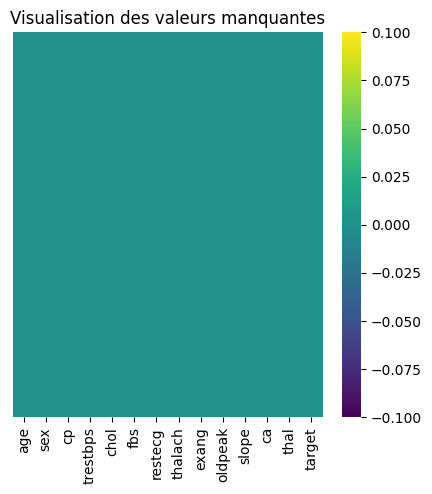

In [5]:
# Vérifier les valeurs manquantes
missing_values = data.isnull()

# Créer une heatmap pour visualiser les valeurs manquantes
plt.figure(figsize=(5, 5))
sns.heatmap(missing_values, cbar=True, cmap='viridis', yticklabels=False)

# Ajouter un titre au graphique
plt.title('Visualisation des valeurs manquantes')
plt.show()

### **Descriptive statistics**

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


## **EDA**

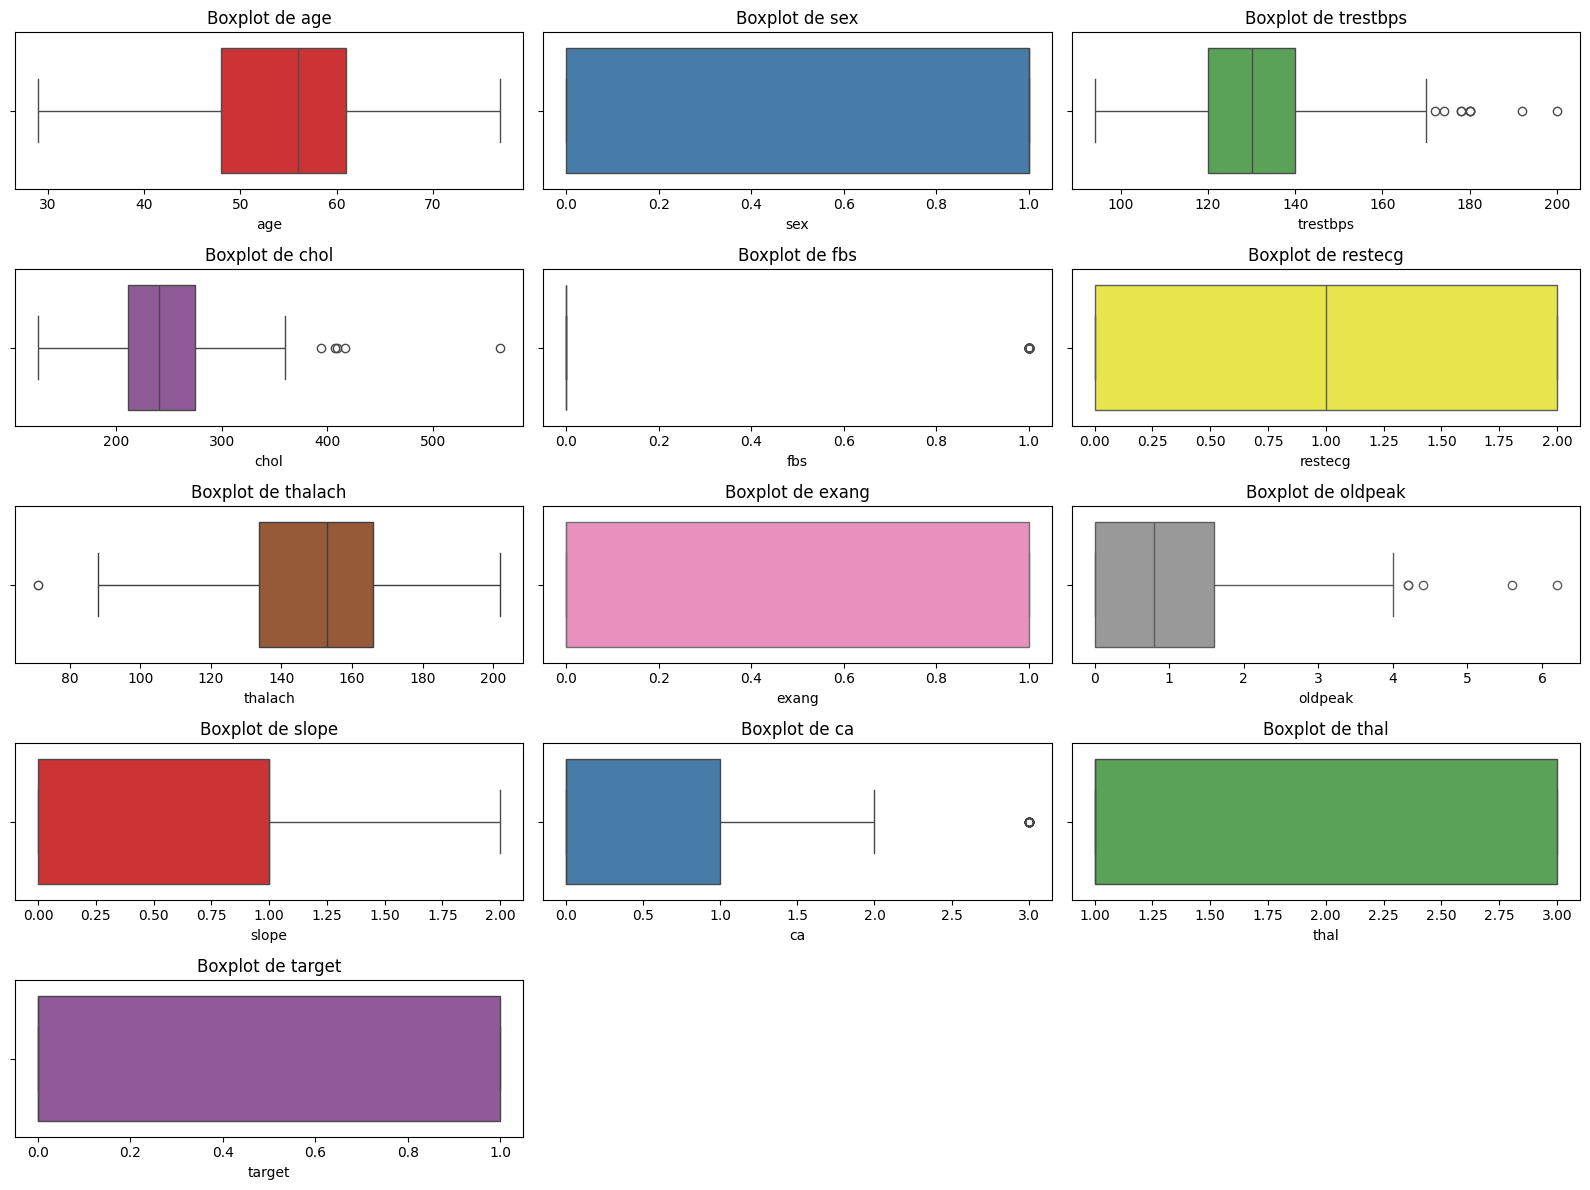

In [7]:
# Colonnes à tracer
columns = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang','oldpeak','slope','ca','thal','target']

# Générer autant de couleurs qu'il y a de colonnes
colors = sns.color_palette('Set1', n_colors=len(columns))

plt.figure(figsize=(16, 12))
for i, (col, color) in enumerate(zip(columns, colors), 1):
    ax = plt.subplot(5, 3, i)          
    sns.boxplot(x=data[col], color=color, ax=ax)
    ax.set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


In [8]:
# Fonction pour supprimer les outliers par la méthode IQR
def remove_outliers_iqr(df, column):
    # Calcul des quantiles Q1 et Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calcul de l'IQR
    IQR = Q3 - Q1

    # Définition des bornes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Détection et suppression des outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered, len(outliers)

# Copier les données pour ne pas modifier l'original
new_data = data.copy()

# Sélectionner uniquement les colonnes numériques
columns_to_check = new_data.select_dtypes(include=[np.number]).columns.tolist()

# Initialiser un compteur global
total_removed_outliers = 0

# Suppression des outliers pour chaque colonne numérique
for column in columns_to_check:
    # Vérifier que la colonne n'est pas vide
    if new_data[column].dropna().empty:
        print(f"Colonne {column} vide ou seulement des NaN. Ignorée.")
        continue

    new_data, removed_count = remove_outliers_iqr(new_data, column)
    total_removed_outliers += removed_count
    print(f"Outliers supprimés pour '{column}' : {removed_count}")

# Résumé
print(f"\nNombre total d'outliers supprimés : {total_removed_outliers}")
print(f"Nombre de lignes avant suppression : {len(data)}")
print(f"Nombre de lignes après suppression : {len(new_data)}")


Outliers supprimés pour 'age' : 0
Outliers supprimés pour 'sex' : 0
Outliers supprimés pour 'cp' : 23
Outliers supprimés pour 'trestbps' : 8
Outliers supprimés pour 'chol' : 5
Outliers supprimés pour 'fbs' : 35
Outliers supprimés pour 'restecg' : 0
Outliers supprimés pour 'thalach' : 1
Outliers supprimés pour 'exang' : 0
Outliers supprimés pour 'oldpeak' : 4
Outliers supprimés pour 'slope' : 0
Outliers supprimés pour 'ca' : 11
Outliers supprimés pour 'thal' : 0
Outliers supprimés pour 'target' : 0

Nombre total d'outliers supprimés : 87
Nombre de lignes avant suppression : 303
Nombre de lignes après suppression : 216


## **Model prepration**

In [9]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem**

In [10]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 135, 1: 107})

## **ML models**

Here I take different machine learning algorithm and try to find algorithm which predict accurately.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine


In [11]:
m1 = 'Logistic Regression'
#creation du modele
model = LogisticRegression()

#entrainement du modele
model.fit(X_train, y_train)

#calcul des predictions
y_pred = model.predict(X_test)

#matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

#accuracy

acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",acc_score*100,'\n')
print(classification_report(y_test, y_pred))

confussion matrix
[[25  4]
 [ 3 29]]


Accuracy of Logistic Regression: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



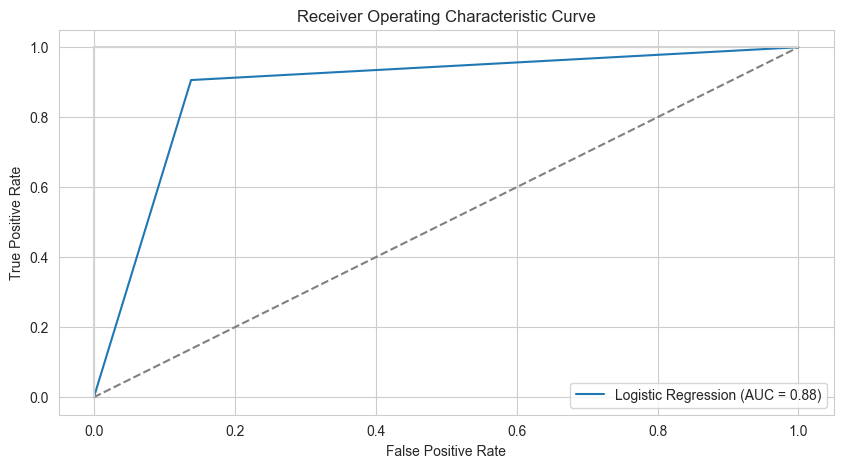

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que y_test et y_pred sont déjà définis
lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(y_test, y_pred)
roc_auc = auc(lr_false_positive_rate, lr_true_positive_rate)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic Curve')

plt.plot(lr_false_positive_rate, lr_true_positive_rate, 
         label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot([0, 0], [1, 0], color='lightgrey')
plt.plot([1, 1], color='lightgrey')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('ROC_Characteristic_Curve.png')
plt.show()


# **Model Evaluation**

In [15]:
model_ev = pd.DataFrame([{
    'Model': 'Logistic Regression',
    'Accuracy': acc_score * 100
}])
model_ev


,Model,Accuracy
0,Logistic Regression,88.52459


# **Conclusion**

1) 
2) 

3) 

**Feel free to ask any question related to this topic. I'm happy to answer. If you like my work please upvote.**

**HAPPY LEARNING :-)**